<span style="font-size: 14pt">MIPT, Advanced ML, Autumn 2017</span>

<span style="font-size: 16pt"> HW#1 </span>

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Лукишн Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.
- Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс., глава 11

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall <номер_группы> <фамилия>``, к примеру -- ``ML2017_Aut_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall Question <Содержание вопроса>``

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 

<h1 align="center">Check Questions (15%)</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: Опишите, как изменяется адаптивная способность алгоритма ЭСС при изменении параметра $\alpha$ от 0 до 1.

Чем меньше $ \alpha $, тем меньше мы учитываем последние значения временного ряда и, наоборот, чем больше $ \alpha $, тем больше учитываются последние значения.

**Вопрос 2**: Каким следует выбрать параметр сглаживания тренда $\beta$ в модели Хольта (линейный тренд) в случае, когда вы предсказываете временной ряд 1) с плавно меняющимя трендом; 2) стохастически меняющися трендом?

1. В случае плавно меняющегося тренда $ \beta $ нужно брать достаточно маленьким
2. В случае стохастически меняющегося тренда $ \beta $ нужно брать достаточно большим, чтобы как можно лучше и быстрее подстраиваться под тренд и отслеживать его изменения

**Вопрос 3**: Докажите  эквивалетность формул расчёта (в рекуррентной форме и в форме корректировки прогноза (correction error form) )скрытых компонент временного ряда в модели Тейла-Вейджа (период сезонность обозначается $p$):
$$l_t = \alpha (y_t - s_{t-p}) + (1-\alpha) (l_{t-1} + b_{t-1} ) \color{red}{=} l_{t-1} + b_{t-1} + \alpha e_t;$$,
    $$ b_t = \beta (l_{t} - l_{t-1} ) + (1-\beta) b_{t-1} \color{red}{=} b_{t-1} + \alpha\beta e_t;$$,
    $$ s_t = \gamma (y_t-l_t) + (1-\gamma) s_{t-p} \color{red}{=} s_{t-p} + \gamma(1-\alpha)e_t.$$,

<Ответ>

**Вопрос 4**: Выведите формулу расчёта скрытых компонент в форме корректировки прогноза (correction error form) временного ряда в модели ЭС с линейным затухающим трендом (WS with additive damped trend):

$$\hat{y}_{t+d|t} = l_t + \left(\phi + \phi^2 + \dots + \phi^{d}\right) b_t.$$,
   
Скрытые компоненты ВР согласно модели в рекуррентной форме записываются:
    $$ l_{t}       = \alpha y_t + \left(1-\alpha\right) \left(l_{t-1} +\phi b_{t-1}\right),$$,
    $$ b_t         = \beta \left(l_t - l_{t-1}\right) + \left(1-\beta\right)\phi b_{t-1}.$$


<Ответ>

-----------
PS: Если проверяющий не понял ответ на большинство вопросов, то будет пичалька. Пишите так, чтобы можно было разобраться. 

<h1 align="center"> Practice</h1>
#  1. reading data (5%)

  * Download data for following data sets
     - 1) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv </span>(1 TS of monthly wage in Russia)

,Real wage
Month,
1993-01-01,100.00
1993-02-01,99.04
1993-03-01,101.77
1993-04-01,110.05
1993-05-01,115.47


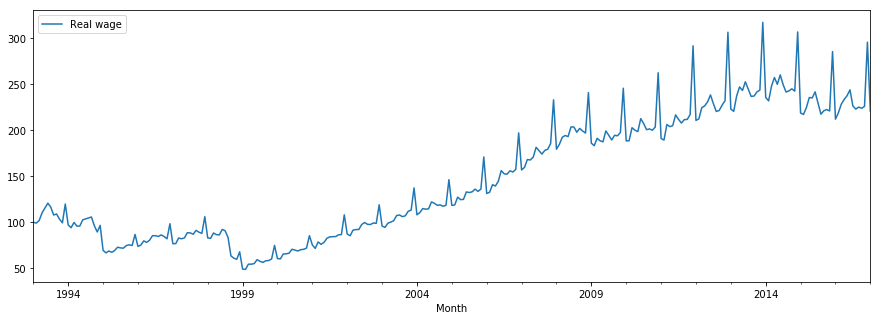

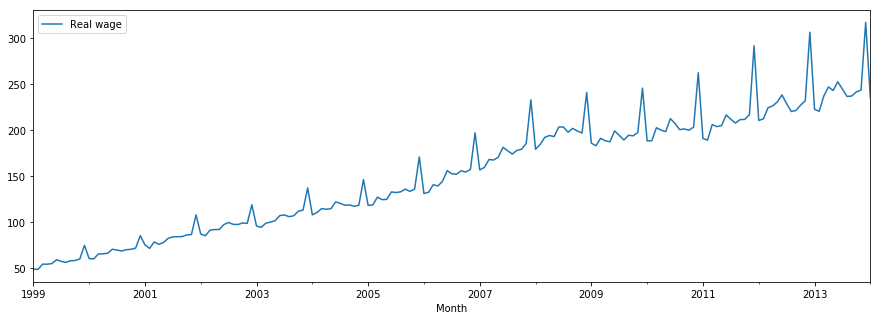

In [1]:
# start with this code
import pandas as pd
import numpy as np
from utils import InitExponentialSmoothing, WintersExponentialSmoothing, BuildForecast, plotTSForecast
from utils import qualityRMSE, qualityMedianAE, qualityMACAPE, qualitySSE, qualityMSE, qualityMAPE 

%matplotlib inline


wage = pd.read_csv('./data/monthly-wage.csv', sep=';', decimal='.', index_col='Month', parse_dates=True, dayfirst=True)

# Put your code below

wage.plot(figsize=(15,5))
wage.loc['1999-01-01':'2014-01-01', wage.columns[range(1)]].plot(figsize=(15,5))
wage.head(5)

# 2. Build the Forecast with  IES (5%)

You need to apply IES model (see seminar 1) for the TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.


* 0) Forecast Wage TS with SES $\alpha=.1$.
* 1) Find the best param $\alpha$ of SES for data period from 09.1998 to 01.2015. Is the optimal value close to 0 or 1? (You 
can choose any loss function above).
* 2) Draw the forecast that correspond to IES with optimial value $\alpha$ (use time steps from 09.1998 to 01.2017.)
     Conclude whether IES can be used for this TS? If can not than explain why.
* 3) Calculate loss of the forecast of TS in [02.2015, 01.2017]. (You can choose any Loss function from seminar 1).

## 0. $ \alpha = 0.1 $

In [4]:
ALPHA = np.array([0.1])
ESParamsArray = [{'alpha':alpha, 'AdaptationPeriod': 8} for alpha in ALPHA]
FRC_WAGE = BuildForecast(h=1, ts=wage, AlgName =  'InitExponentialSmoothing', AlgTitle='IES',\
                         ParamsArray = ESParamsArray, step = 'MS')

In [5]:
QualityStr = pd.DataFrame(index = wage.columns, columns = FRC_WAGE.keys())

ix = wage.loc['1998-09-01':'2015-01-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE[param_cntr]
    QualityStr[param_cntr],_ = qualityMAPE(wage.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

IES {'alpha': 0.10000000000000001, 'AdaptationPeriod': 8}    0.090524
dtype: float64

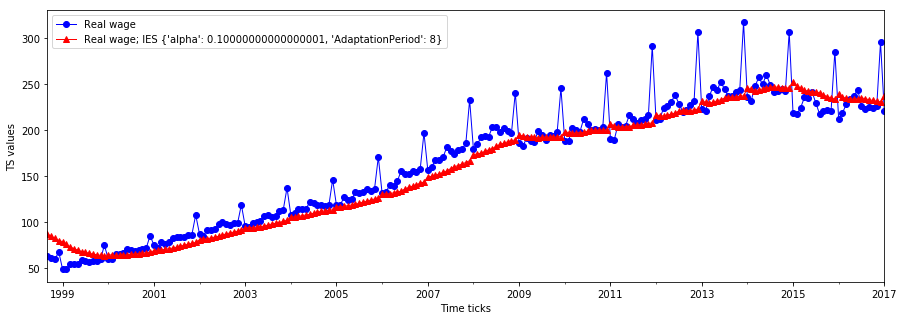

In [6]:
algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wage.loc['1998-09-01':'2017-01-01'], FRC_WAGE[algName].loc['1998-09-01':'2017-01-01']
               , ts_num=0, alg_title=algName)

## 1) Search for the optimal $\alpha$ 

In [8]:
ALPHA = np.linspace(0.01 , 1, 99)
ESParamsArray = [{'alpha':alpha, 'AdaptationPeriod': 8} for alpha in ALPHA]
FRC_WAGE = BuildForecast(h=1, ts=wage, AlgName =  'InitExponentialSmoothing', AlgTitle='IES',\
                         ParamsArray = ESParamsArray, step = 'MS')

In [9]:
QualityStr = pd.DataFrame(index = wage.columns, columns = FRC_WAGE.keys())

ix = wage.loc['1998-09-01':'2015-01-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE[param_cntr]
    QualityStr[param_cntr],_ = qualityMAPE(wage.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

IES {'alpha': 0.39387755102040817, 'AdaptationPeriod': 8}     0.058482
IES {'alpha': 0.38377551020408163, 'AdaptationPeriod': 8}     0.058485
IES {'alpha': 0.40397959183673471, 'AdaptationPeriod': 8}     0.058492
IES {'alpha': 0.37367346938775509, 'AdaptationPeriod': 8}     0.058504
IES {'alpha': 0.41408163265306119, 'AdaptationPeriod': 8}     0.058510
IES {'alpha': 0.42418367346938773, 'AdaptationPeriod': 8}     0.058535
IES {'alpha': 0.36357142857142855, 'AdaptationPeriod': 8}     0.058556
IES {'alpha': 0.43428571428571427, 'AdaptationPeriod': 8}     0.058571
IES {'alpha': 0.44438775510204082, 'AdaptationPeriod': 8}     0.058658
IES {'alpha': 0.35346938775510206, 'AdaptationPeriod': 8}     0.058660
IES {'alpha': 0.45448979591836736, 'AdaptationPeriod': 8}     0.058776
IES {'alpha': 0.34336734693877552, 'AdaptationPeriod': 8}     0.058808
IES {'alpha': 0.4645918367346939, 'AdaptationPeriod': 8}      0.058905
IES {'alpha': 0.33326530612244898, 'AdaptationPeriod': 8}     0.058999
IES {'

## 2) draw the forecast with optimial value $\alpha $

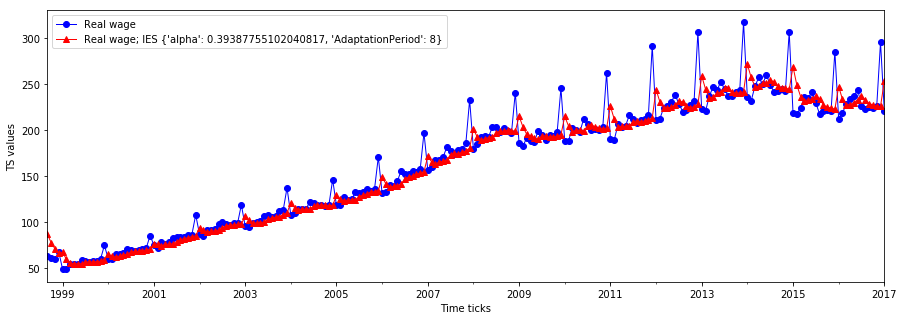

In [10]:
algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wage.loc['1998-09-01':'2017-01-01'], FRC_WAGE[algName].loc['1998-09-01':'2017-01-01']
               , ts_num=0, alg_title=algName)

** Question**
    * Does SES follow to the TS components?

No it doesn't. SES fails to predict TS trend and seasonality and also falls behind in time

## 3) Calculate loss of the forecast of TS in [02.2015, 01.2017]

In [11]:
qualityMAPE(wage.loc['2015-02-01':'2017-01-01'], FRC_WAGE[algName].loc['2015-02-01':'2017-01-01'])[0]

Real wage    0.06194
dtype: float64

# 3. Winters model for Additive Seasonality (25%)
You need to realize ES model for TS with additive seasonality and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Winters model for Seasonal TS
* 2) Find optimal params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw the forecast that correspond optimal values $\alpha$ and $\gamma$ (data from 09.1998 to 01.2017). 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of IES: is it better? 
* 5) Conclude whether Winter's ES can be used for this TS?

In [12]:
def WintersExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    delta = Params['delta']
    p = Params['seasonality_period']
    N = T//p
    
    FORECAST = [np.NaN]*(T+h)

    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    if delta>1:
        w.warn('beta can not be more than 1')
        #beta = 1
        return FORECAST
    if delta<0:
        w.warn('beta can not be less than 0')
        #beta = 0
        return FORECAST
    
    l = np.nan # initialize ts level 
    s = np.zeros(T) # initalize seasonality values (it must be vector of lenth p)
    A = np.zeros(N)
    
    for t in range(T):
        if not math.isnan(x[t]):
            if math.isnan(l):
                l= x[t]
            if np.all(s == 0):
                for j in range(N):
                        A[j] = np.sum([x[p * j + k] for k in range(p)])/p
                for i in range(p):
                    s[i] = np.sum([x[p * j + i]/A[j] for j in range(N)])/N
            
            if t >= p:
                l_prev = l
                l = alpha * (x[t] - s[t - p]) + (1 - alpha) * l_prev # recurrent smoothing of level
                s[t] = delta * (x[t] - l_prev) + (1 - delta) * s[t - p] # recurrent smoothing of seasonality
            
        FORECAST[t + h] = l + s[t - p + 1 + (h - 1) % p]
    return FORECAST

In [14]:
ALPHA = np.linspace(0.01, 1, 10)
DELTA = np.linspace(0.01, 1, 10)
WESParamsArray = [{'alpha':alpha, 'delta':delta, 'seasonality_period':12} for alpha in ALPHA for delta in DELTA]
FRC_WAGE = BuildForecast(h=1, ts=wage, AlgName =  'WintersExponentialSmoothing', AlgTitle='WES',\
                              ParamsArray = WESParamsArray, step='M')

In [15]:
QualityStr = pd.DataFrame(index = wage.columns, columns = FRC_WAGE.keys())

ix = wage.loc['1998-09-01':'2015-01-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE[param_cntr]
    QualityStr[param_cntr],_ = qualityMAPE(wage.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

WES {'alpha': 0.67000000000000004, 'delta': 0.45000000000000001, 'seasonality_period': 12}    0.023324
WES {'alpha': 0.67000000000000004, 'delta': 0.56000000000000005, 'seasonality_period': 12}    0.023480
WES {'alpha': 0.78000000000000003, 'delta': 0.45000000000000001, 'seasonality_period': 12}    0.023584
WES {'alpha': 0.78000000000000003, 'delta': 0.34000000000000002, 'seasonality_period': 12}    0.023625
WES {'alpha': 0.67000000000000004, 'delta': 0.34000000000000002, 'seasonality_period': 12}    0.023639
WES {'alpha': 0.56000000000000005, 'delta': 0.45000000000000001, 'seasonality_period': 12}    0.023866
WES {'alpha': 0.56000000000000005, 'delta': 0.56000000000000005, 'seasonality_period': 12}    0.023988
WES {'alpha': 0.78000000000000003, 'delta': 0.56000000000000005, 'seasonality_period': 12}    0.024112
WES {'alpha': 0.89000000000000001, 'delta': 0.45000000000000001, 'seasonality_period': 12}    0.024307
WES {'alpha': 0.56000000000000005, 'delta': 0.34000000000000002, 'seasona

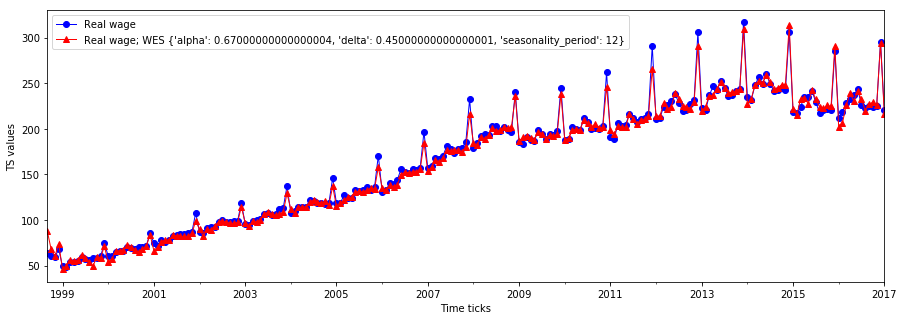

In [16]:
algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wage.loc['1998-09-01':'2017-01-01'], FRC_WAGE[algName].loc['1998-09-01':'2017-01-01']
               , ts_num=0, alg_title=algName)

In [17]:
qualityMAPE(wage.loc['2015-02-01':'2017-01-01'], FRC_WAGE[algName].loc['2015-02-01':'2017-01-01'])[0]

Real wage    0.01924
dtype: float64

### Winter's ES is not good enough for this TS as long as it doesn't have trend smoothing, but is still can be used

# 4. Theil-Wage model for TS with linear trend and seasonality (25%)
You need to realize Theil-Wage model and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Theil-Wage model for
* 2) Find optimal params $\alpha$ (smoothing of level), $\beta$ (smoothing trend) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values $\alpha$, $\beta$ and $\gamma$ from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model: is it better than the last one? 
* \*5) Suggest how can the Theil-Wage model be improved to make accuracy of forecast better?

In [18]:
def TheilWageExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    delta = Params['delta']
    p = Params['seasonality_period']
    N = T//p
    
    FORECAST = [np.NaN]*(T+h)

    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    if delta>1:
        w.warn('beta can not be more than 1')
        #beta = 1
        return FORECAST
    if delta<0:
        w.warn('beta can not be less than 0')
        #beta = 0
        return FORECAST
    
    l = np.nan # initialize ts level 
    b = np.nan 
    s = np.zeros(T) # initalize seasonality values (it must be vector of lenth p)
    A = np.zeros(N)
    
    for t in range(T):
        if not math.isnan(x[t]):
            if math.isnan(l):
                l = x[t]
            if math.isnan(b):
                b = np.sum([(x[p + i] - x[i])/p for i in range(1, p + 1)])/p
            if np.all(s == 0):
                for j in range(N):
                        A[j] = np.sum([x[p * j + k] for k in range(p)])/p
                for i in range(p):
                    s[i] = np.sum([x[p * j + i]/A[j] for j in range(N)])/N
            
            if t >=p:
                l_prev = l
                b_prev = b
                l = alpha * (x[t] - s[t - p]) + (1 - alpha) * (l_prev + b_prev) # recurrent smoothing of level
                b = beta * (l - l_prev) + (1 - beta) * b_prev # reccurent smoothing of trend
                s[t] = delta * (x[t] - l_prev - b_prev) + (1 - delta) * s[t - p] # recurrent smoothing of seasonality
            
        FORECAST[t + h] = l + h * b + s[t - p + 1 + (h - 1) % p]
    return FORECAST

In [19]:
ALPHA = np.linspace(0.01, 1, 10)
BETA = np.linspace(0.01, 1, 10)
DELTA = np.linspace(0.01, 1, 10)
TWESParamsArray = [{'alpha':alpha, 'beta':beta, 'delta':delta, 'seasonality_period':12} for alpha in ALPHA for beta in BETA for delta in DELTA]
FRC_WAGE = BuildForecast(h=1, ts=wage, AlgName =  'TheilWageExponentialSmoothing', AlgTitle='TWES',\
                              ParamsArray = TWESParamsArray, step='M')

In [20]:
QualityStr = pd.DataFrame(index = wage.columns, columns = FRC_WAGE.keys())

ix = wage.loc['1998-09-01':'2015-01-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE[param_cntr]
    QualityStr[param_cntr],_ = qualityMAPE(wage.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

TWES {'alpha': 0.67000000000000004, 'beta': 0.01, 'delta': 0.45000000000000001, 'seasonality_period': 12}                        0.023956
TWES {'alpha': 0.78000000000000003, 'beta': 0.01, 'delta': 0.45000000000000001, 'seasonality_period': 12}                        0.024181
TWES {'alpha': 0.67000000000000004, 'beta': 0.01, 'delta': 0.56000000000000005, 'seasonality_period': 12}                        0.024518
TWES {'alpha': 0.78000000000000003, 'beta': 0.01, 'delta': 0.34000000000000002, 'seasonality_period': 12}                        0.024549
TWES {'alpha': 0.67000000000000004, 'beta': 0.01, 'delta': 0.34000000000000002, 'seasonality_period': 12}                        0.024589
TWES {'alpha': 0.78000000000000003, 'beta': 0.01, 'delta': 0.56000000000000005, 'seasonality_period': 12}                        0.024695
TWES {'alpha': 0.56000000000000005, 'beta': 0.12, 'delta': 0.45000000000000001, 'seasonality_period': 12}                        0.024882
TWES {'alpha': 0.67000000000000004

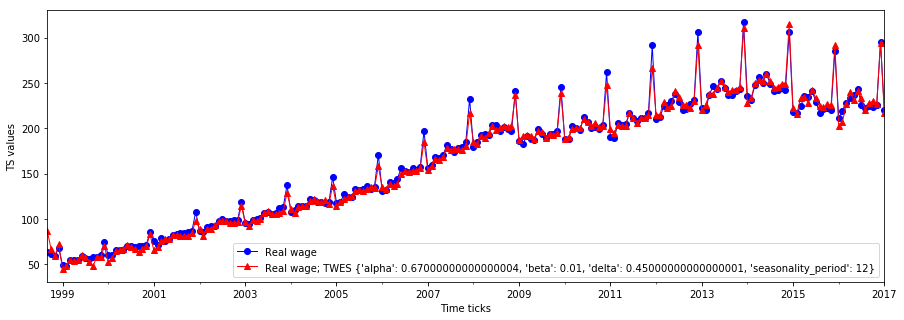

In [21]:
algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wage.loc['1998-09-01':'2017-01-01'], FRC_WAGE[algName].loc['1998-09-01':'2017-01-01']
               , ts_num=0, alg_title=algName)

In [22]:
qualityMAPE(wage.loc['2015-02-01':'2017-01-01'], FRC_WAGE[algName].loc['2015-02-01':'2017-01-01'])[0]

Real wage    0.019535
dtype: float64

# 5. Non-additive model of ES (25%)
You need to realize some ES-model that include non-addive component (or multiplicative trend or multiplicative component) and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize one of following ES models: ESM(A,M) (t.e. Holt-Winters model), ESM(Ad,M), ESM(M,A), ESM(M,M) model.
* 2) Find optimal params of the model (use data from 09.1998 to 01.2015). Note: if you choose damped trend model that $\phi$ you can just set it by expert opinion (say $0.98$). (Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values of it's params (data from 09.1998 to 01.2017). 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model and Theil-Wage model: is it better than the last one? 
* 5) Is it true that multiplicative model are more unstable than additive? Unstable means thet forecast is can diveret

In [23]:
def MultiplicativeExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    delta = Params['delta']
    p = Params['seasonality_period']
    N = T//p
    
    FORECAST = [np.NaN]*(T+h)

    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    if delta>1:
        w.warn('beta can not be more than 1')
        #beta = 1
        return FORECAST
    if delta<0:
        w.warn('beta can not be less than 0')
        #beta = 0
        return FORECAST
    
    l = np.nan # initialize ts level 
    b = np.nan 
    s = np.zeros(T) # initalize seasonality values (it must be vector of lenth p)
    A = np.zeros(N)
    
    for t in range(T):
        if not math.isnan(x[t]):
            if math.isnan(l):
                l = x[t]
            if math.isnan(b):
                b = np.sum([(x[p + i] - x[i])/p for i in range(1, p + 1)])/p
            if np.all(s == 0):
                for j in range(N):
                        A[j] = np.sum([x[p * j + k] for k in range(p)])/p
                for i in range(p):
                    s[i] = np.sum([x[p * j + i]/A[j] for j in range(N)])/N
            
            if t >= p:
                l_prev = l
                b_prev = b
                l = alpha * (x[t] / s[t - p]) + (1 - alpha) * (l_prev + b_prev) # recurrent smoothing of level
                b = beta * (l - l_prev) + (1 - beta) * b_prev # reccurent smoothing of trend
                s[t] = delta * (x[t] / l) + (1 - delta) * s[t - p] # recurrent smoothing of seasonality
            
        FORECAST[t + h] = (l + h * b) * s[t - p + 1 + (h - 1) % p]
    return FORECAST

In [2]:
ALPHA = np.linspace(0.01, 1, 10)
BETA = np.linspace(0.01, 1, 10)
DELTA = np.linspace(0.01, 1, 10)
MESParamsArray = [{'alpha':alpha, 'beta':beta, 'delta':delta, 'seasonality_period':12} for alpha in ALPHA for beta in BETA for delta in DELTA]
FRC_WAGE = BuildForecast(h=1, ts=wage, AlgName =  'MultiplicativeExponentialSmoothing', AlgTitle='MES',\
                              ParamsArray = MESParamsArray, step='M')

In [3]:
QualityStr = pd.DataFrame(index = wage.columns, columns = FRC_WAGE.keys())

ix = wage.loc['1998-09-01':'2015-01-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE[param_cntr]
    QualityStr[param_cntr],_ = qualityMAPE(wage.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

MES {'alpha': 1.0, 'beta': 0.12, 'delta': 0.89000000000000001, 'seasonality_period': 12}                                    0.020730
MES {'alpha': 1.0, 'beta': 0.12, 'delta': 0.78000000000000003, 'seasonality_period': 12}                                    0.020730
MES {'alpha': 1.0, 'beta': 0.12, 'delta': 0.56000000000000005, 'seasonality_period': 12}                                    0.020730
MES {'alpha': 1.0, 'beta': 0.12, 'delta': 1.0, 'seasonality_period': 12}                                                    0.020730
MES {'alpha': 1.0, 'beta': 0.12, 'delta': 0.34000000000000002, 'seasonality_period': 12}                                    0.020730
MES {'alpha': 1.0, 'beta': 0.12, 'delta': 0.12, 'seasonality_period': 12}                                                   0.020730
MES {'alpha': 1.0, 'beta': 0.12, 'delta': 0.67000000000000004, 'seasonality_period': 12}                                    0.020730
MES {'alpha': 1.0, 'beta': 0.12, 'delta': 0.45000000000000001, 'seaso

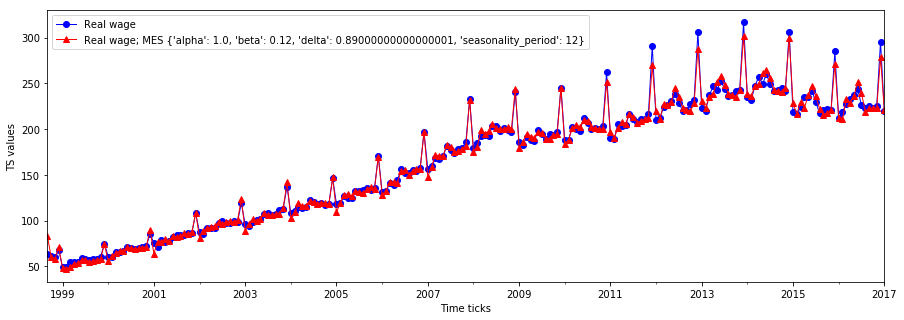

In [4]:
algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wage.loc['1998-09-01':'2017-01-01'], FRC_WAGE[algName].loc['1998-09-01':'2017-01-01']
               , ts_num=0, alg_title=algName)

In [5]:
qualityMAPE(wage.loc['2015-02-01':'2017-01-01'], FRC_WAGE[algName].loc['2015-02-01':'2017-01-01'])[0]

Real wage    0.022159
dtype: float64

### It seems that multiplicative model is more unstable than additive as we can see on the plot